In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/paad-gene-expression-classification/PAAD.gct'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### **Introduction :**

**Pancreatic Adenocarcinoma (PAAD) is the third most common cause of death from cancer, with an overall 5-year survival rate of less than 5%, and is predicted to become the second leading cause of cancer mortality in the United States by 2030**

**Here we're trying to understand the gene expression distribution for all samples and what the analysis say about the general behaviour of different samples.**

**We also want to stratify these tumor samples by the type of pancreatic cancer they exhibit. For this,we're applying dimensionality reduction techniques (PCA) to find these two groups within this multi-dimensional data.**

**After that unsupervised clustering on the gene expression data is done to identify the correlations of the clusters so formed with the sample metadata.**



In [2]:
!pip install cmapPy

from cmapPy.pandasGEXpress.parse_gct import parse
from cmapPy.pandasGEXpress.write_gct import write

     |████████████████████████████████| 150 kB 908 kB/s eta 0:00:01


In [3]:
data = parse('../input/paad-gene-expression-classification/PAAD.gct')

In [4]:
print(data)

GCT1.3
src: ../input/paad-gene-expression-classification/PAAD.gct
data_df: [18465 rows x 183 columns]
row_metadata_df: [18465 rows x 0 columns]
col_metadata_df: [183 rows x 124 columns]


In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## **Data Cleaning and Analysis**

In [6]:
csvdata = pd.read_csv("../input/paad-gene-expression-classification/PAAD.gct", sep = '\t' , skiprows =  3)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
csvdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18588 entries, 0 to 18587
Columns: 184 entries, participant_id to aapl
dtypes: object(184)
memory usage: 26.1+ MB


In [8]:
csvdata.isnull().sum()

participant_id       0
aab1               694
aab4               584
aab6              1041
aab8              1072
                  ... 
a89d               632
a89d.1             643
a8sy               889
a8lh               747
aapl               994
Length: 184, dtype: int64

In [9]:
csvdata.iloc[120:,:]

participant_id    aab1    aab4    aab6    aab8  \
120                 year_of_form_completion    2014    2014    2014    2014   
121    year_of_initial_pathologic_diagnosis    2012    2012    2012    2012   
122           year_of_tobacco_smoking_onset    1962     NaN     NaN     NaN   
123                                 SLC35E2  7.4500  8.1000  7.2000  8.0000   
124                                    A1BG  6.4000  5.8000  6.4000  5.8000   
...                                     ...     ...     ...     ...     ...   
18583                                ZYG11B     9.2     9.3     9.4     9.4   
18584                                   ZYX    12.9    12.4    13.5    12.5   
18585                                 ZZEF1    10.1     9.8     9.8     9.7   
18586                                  ZZZ3     9.3     8.9     9.2     9.3   
18587                             psiTPTE22     5.5     4.5     4.7     6.4   

         aab9    aaba    aabe    aabf    aabh  ...    aauh    aaui    aaul  \
120      2014    2014    2014    2014    2014  ...    2015    2014    2015   
121      2012    2012    2012    2012    2011  ...    2013    2013    2013   
122       NaN     NaN    1960    1960     NaN  ...     NaN    1979    1984   
123    7.6500  8.1000  8.2000  8.2000  7.5500  ...  8.4500  7.9500  8.3000   
124    6.7000  6.6000  6.3000  6.5000  5.7000  ...  7.1000  7.1000  6.7000   
...       ...     ...     ...     ...     ...  ...     ...     ...     ...   
18583     9.3     9.9     9.1     9.5     8.9  ...     9.7     9.2     9.5   
18584      13    12.2    12.9    12.6    12.7  ...    12.4    12.6    13.5   
18585    10.1    10.4     9.7    10.6      10  ...    10.6     9.9     9.8   
18586     9.2     9.6     8.9     9.8     8.8  ...     9.6       9       9   
18587     4.9       5     5.6     5.1     4.6  ...       6     4.9     5.3   

         a8t3    a8t5    a89d  a89d.1    a8sy    a8lh    aapl  
120      2015    2015    2014    2014    2014    2014    2014  
121      2012    2012    2013    2013    2011    2009    2013  
122       NaN    1974     NaN     NaN     NaN    1963     NaN  
123    8.0500  8.2000  7.2500  7.4000  7.3500  7.2000  9.0500  
124    7.0000  6.9000  7.1000  7.3000  7.9000  6.0000  6.9000  
...       ...     ...     ...     ...     ...     ...     ...  
18583     9.5     9.4     9.4     9.6     9.2     8.3     9.5  
18584    12.5    12.7    13.6    13.1    13.2    12.3    12.3  
18585    10.3    10.4    10.2     9.9     9.8     9.6    10.9  
18586     9.5     9.2     8.5     8.8     8.6     8.4     9.4  
18587     5.6     6.1     7.2     5.1     5.9     2.4     5.4  

[18468 rows x 184 columns]

In [10]:
csvdata = csvdata.loc[123:, :]
csvdata

participant_id     aab1    aab4    aab6    aab8     aab9    aaba  \
123          SLC35E2   7.4500  8.1000  7.2000  8.0000   7.6500  8.1000   
124             A1BG   6.4000  5.8000  6.4000  5.8000   6.7000  6.6000   
125             A1CF   4.7000  5.7000  3.0000  5.1000   4.4000  4.2000   
126            A2BP1  -1.0000  1.1000     NaN     NaN  0.10000     NaN   
127            A2LD1   7.5000  6.8000  7.3000  7.5000   7.4000  6.6000   
...              ...      ...     ...     ...     ...      ...     ...   
18583         ZYG11B      9.2     9.3     9.4     9.4      9.3     9.9   
18584            ZYX     12.9    12.4    13.5    12.5       13    12.2   
18585          ZZEF1     10.1     9.8     9.8     9.7     10.1    10.4   
18586           ZZZ3      9.3     8.9     9.2     9.3      9.2     9.6   
18587      psiTPTE22      5.5     4.5     4.7     6.4      4.9       5   

         aabe    aabf     aabh  ...    aauh    aaui      aaul    a8t3    a8t5  \
123    8.2000  8.2000   7.5500  ...  8.4500  7.9500    8.3000  8.0500  8.2000   
124    6.3000  6.5000   5.7000  ...  7.1000  7.1000    6.7000  7.0000  6.9000   
125    1.6000  6.8000   6.0000  ...  5.4000  6.4000    6.5000  4.4000  3.3000   
126       NaN  1.7000  0.40000  ...  3.5000  1.3000  -0.30000     NaN  2.1000   
127    7.1000  6.8000   8.0000  ...  6.5000  7.3000    6.1000  6.7000  6.5000   
...       ...     ...      ...  ...     ...     ...       ...     ...     ...   
18583     9.1     9.5      8.9  ...     9.7     9.2       9.5     9.5     9.4   
18584    12.9    12.6     12.7  ...    12.4    12.6      13.5    12.5    12.7   
18585     9.7    10.6       10  ...    10.6     9.9       9.8    10.3    10.4   
18586     8.9     9.8      8.8  ...     9.6       9         9     9.5     9.2   
18587     5.6     5.1      4.6  ...       6     4.9       5.3     5.6     6.1   

         a89d  a89d.1    a8sy    a8lh    aapl  
123    7.2500  7.4000  7.3500  7.2000  9.0500  
124    7.1000  7.3000  7.9000  6.0000  6.9000  
125    3.6000  6.2000  1.2000  4.9000  2.0000  
126    2.0000  0.0000     NaN  2.0000     NaN  
127    6.7000  6.7000  6.5000  6.9000  6.7000  
...       ...     ...     ...     ...     ...  
18583     9.4     9.6     9.2     8.3     9.5  
18584    13.6    13.1    13.2    12.3    12.3  
18585    10.2     9.9     9.8     9.6    10.9  
18586     8.5     8.8     8.6     8.4     9.4  
18587     7.2     5.1     5.9     2.4     5.4  

[18465 rows x 184 columns]

In [11]:
#Identifying the null values 

is_NaN = csvdata.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = csvdata[row_has_NaN]

rows_with_NaN

participant_id     aab1     aab4     aab6      aab8     aab9    aaba  \
125             A1CF   4.7000   5.7000   3.0000    5.1000   4.4000  4.2000   
126            A2BP1  -1.0000   1.1000      NaN       NaN  0.10000     NaN   
128            A2ML1   6.4000      NaN   10.800    4.1000   9.3000  9.8000   
131            A4GNT   8.8000   5.6000  0.20000    3.2000   5.7000  2.6000   
132             AAA1   1.0000  -1.2000  0.20000  -0.10000      NaN  4.2000   
...              ...      ...      ...      ...       ...      ...     ...   
18563        ZSCAN23      3.4      3.7      2.4         4      4.3     5.4   
18566         ZSCAN4      0.5     -1.2        2       4.2      1.7     5.2   
18568        ZSCAN5B      0.5      0.8      0.8       2.5      0.1     0.3   
18582         ZYG11A      NaN      NaN     -0.8       1.9      0.1     0.3   
18587      psiTPTE22      5.5      4.5      4.7       6.4      4.9       5   

         aabe    aabf     aabh  ...     aauh    aaui      aaul      a8t3  \
125    1.6000  6.8000   6.0000  ...   5.4000  6.4000    6.5000    4.4000   
126       NaN  1.7000  0.40000  ...   3.5000  1.3000  -0.30000       NaN   
128    6.2000  3.8000   2.3000  ...  0.10000  3.4000    3.7000  -0.90000   
131    5.1000  6.9000   4.3000  ...   4.1000  5.2000    4.4000    5.6000   
132       NaN  2.5000   1.4000  ...   1.9000     NaN    1.7000  -0.90000   
...       ...     ...      ...  ...      ...     ...       ...       ...   
18563     4.4     4.6      4.2  ...      4.1     3.4       3.4       4.1   
18566     3.1     1.7      1.8  ...      NaN     3.8       4.3       0.7   
18568    -0.7     1.5      0.4  ...     -0.9       1       NaN       NaN   
18582    -0.7     0.1     -1.2  ...      NaN     1.8       NaN      -0.9   
18587     5.6     5.1      4.6  ...        6     4.9       5.3       5.6   

         a8t5    a89d  a89d.1     a8sy    a8lh    aapl  
125    3.3000  3.6000  6.2000   1.2000  4.9000  2.0000  
126    2.1000  2.0000  0.0000      NaN  2.0000     NaN  
128    3.6000  1.0000  2.8000   10.500  3.1000  5.1000  
131    5.8000  2.7000  4.3000  0.80000  6.6000  2.2000  
132       NaN  1.3000  1.8000      NaN  1.8000     NaN  
...       ...     ...     ...      ...     ...     ...  
18563     4.4     3.7     4.8      3.7     0.4       3  
18566     NaN       1     4.7      3.1       5     3.4  
18568     1.6     NaN      -1     -0.8     0.8     NaN  
18582     0.8     0.6     NaN     -0.8     NaN     3.1  
18587     6.1     7.2     5.1      5.9     2.4     5.4  

[4367 rows x 184 columns]

**4367 genes have NaN values across different coloumns as seen above**

In [12]:
csv = csvdata.fillna(0)

In [13]:
csv = csv.drop(['participant_id'],axis=1)
csv.head()

aab1    aab4    aab6    aab8     aab9    aaba    aabe    aabf  \
123   7.4500  8.1000  7.2000  8.0000   7.6500  8.1000  8.2000  8.2000   
124   6.4000  5.8000  6.4000  5.8000   6.7000  6.6000  6.3000  6.5000   
125   4.7000  5.7000  3.0000  5.1000   4.4000  4.2000  1.6000  6.8000   
126  -1.0000  1.1000       0       0  0.10000       0       0  1.7000   
127   7.5000  6.8000  7.3000  7.5000   7.4000  6.6000  7.1000  6.8000   

        aabh     aabi  ...    aauh    aaui      aaul    a8t3    a8t5    a89d  \
123   7.5500   8.4500  ...  8.4500  7.9500    8.3000  8.0500  8.2000  7.2500   
124   5.7000   6.3000  ...  7.1000  7.1000    6.7000  7.0000  6.9000  7.1000   
125   6.0000        0  ...  5.4000  6.4000    6.5000  4.4000  3.3000  3.6000   
126  0.40000  -1.5000  ...  3.5000  1.3000  -0.30000       0  2.1000  2.0000   
127   8.0000   5.8000  ...  6.5000  7.3000    6.1000  6.7000  6.5000  6.7000   

     a89d.1    a8sy    a8lh    aapl  
123  7.4000  7.3500  7.2000  9.0500  
124  7.3000  7.9000  6.0000  6.9000  
125  6.2000  1.2000  4.9000  2.0000  
126  0.0000       0  2.0000       0  
127  6.7000  6.5000  6.9000  6.7000  

[5 rows x 183 columns]

## **Standardisation**

In [14]:
from sklearn.preprocessing import StandardScaler

csv_st =  StandardScaler().fit_transform(csv)
pd.DataFrame(csv_st, columns=csv.columns)

aab1      aab4      aab6      aab8      aab9      aaba      aabe  \
0      0.031938  0.192933  0.007089  0.195328  0.073932  0.214545  0.246257   
1     -0.259060 -0.459480 -0.208529 -0.422431 -0.196502 -0.205918 -0.282985   
2     -0.730198 -0.487845 -1.124908 -0.618990 -0.851234 -0.878660 -1.592163   
3     -2.309897 -1.792672 -1.933478 -2.051067 -2.075300 -2.055957 -2.037840   
4      0.045795 -0.175822  0.034042  0.054928  0.002765 -0.205918 -0.060146   
...         ...       ...       ...       ...       ...       ...       ...   
18460  0.516933  0.533323  0.600041  0.588447  0.543631  0.719101  0.496951   
18461  1.542351  1.412662  1.705086  1.458925  1.596897  1.363812  1.555435   
18462  0.766359  0.675152  0.707850  0.672687  0.771364  0.859256  0.664080   
18463  0.544647  0.419860  0.546136  0.560367  0.515164  0.635009  0.441241   
18464 -0.508486 -0.828235 -0.666719 -0.253951 -0.708901 -0.654413 -0.477969   

           aabf      aabh      aabi  ...      aauh      aaui      aaul  \
0      0.186438  0.063949  0.353202  ...  0.279306  0.130181  0.270250   
1     -0.311510 -0.445548 -0.212716  ... -0.113836 -0.116565 -0.171634   
2     -0.223637 -0.362927 -1.870989  ... -0.608904 -0.319767 -0.226869   
3     -1.717481 -1.905188 -2.265816  ... -1.162215 -1.800244 -2.104874   
4     -0.223637  0.187881 -0.344325  ... -0.288566 -0.058507 -0.337340   
...         ...       ...       ...  ...       ...       ...       ...   
18460  0.567222  0.435744  0.313720  ...  0.643326  0.493043  0.601662   
18461  1.475245  1.482278  1.419235  ...  1.429610  1.480028  1.706371   
18462  0.889423  0.738688  0.734868  ...  0.905421  0.696246  0.684516   
18463  0.655095  0.408204  0.392685  ...  0.614205  0.434985  0.463574   
18464 -0.721585 -0.748492 -0.923405  ... -0.434174 -0.755202 -0.558282   

           a8t3      a8t5      a89d    a89d.1      a8sy      a8lh      aapl  
0      0.172246  0.210439 -0.030183 -0.003177  0.039773  0.013247  0.492300  
1     -0.126502 -0.164743 -0.071863 -0.031490  0.187957 -0.308355 -0.103218  
2     -0.866259 -1.203710 -1.044406 -0.342937 -1.617200 -0.603158 -1.460446  
3     -2.118155 -1.550032 -1.488997 -2.098365 -1.940512 -1.380364 -2.014417  
4     -0.211858 -0.280184 -0.183011 -0.201371 -0.189240 -0.067154 -0.158615  
...         ...       ...       ...       ...       ...       ...       ...  
18460  0.584803  0.556762  0.567237  0.619717  0.538212  0.308049  0.616944  
18461  1.438369  1.509148  1.734288  1.610684  1.615917  1.380057  1.392503  
18462  0.812421  0.845364  0.789532  0.704657  0.699867  0.656452  1.004723  
18463  0.584803  0.499041  0.317154  0.393210  0.376556  0.334849  0.589245  
18464 -0.524832 -0.395624 -0.044076 -0.654384 -0.350896 -1.273163 -0.518696  

[18465 rows x 183 columns]

## **PCA Analysis**

In [15]:
from sklearn.decomposition import PCA

pca_out = PCA().fit(csv_st)

# Get the component variance
# Proportion of Variance (from PC1 to PC183)
pca_out.explained_variance_ratio_

array([9.04761887e-01, 1.32081257e-02, 9.77885687e-03, 7.60196828e-03,
       4.72895714e-03, 3.94758017e-03, 3.24428709e-03, 2.24741098e-03,
       2.10524221e-03, 1.59197942e-03, 1.42175209e-03, 1.30356411e-03,
       1.19761062e-03, 1.13802788e-03, 1.02260140e-03, 9.89927175e-04,
       8.62991169e-04, 8.22435510e-04, 7.95827429e-04, 7.64596285e-04,
       7.51954641e-04, 7.32314197e-04, 6.90431414e-04, 6.78742953e-04,
       6.38511564e-04, 6.27598649e-04, 5.89028479e-04, 5.57074743e-04,
       5.50077479e-04, 5.41652268e-04, 5.03424051e-04, 5.00435985e-04,
       4.90548263e-04, 4.84197712e-04, 4.61749514e-04, 4.50867523e-04,
       4.37436964e-04, 4.30497528e-04, 4.19186138e-04, 4.14805479e-04,
       4.07710238e-04, 3.93845456e-04, 3.88800353e-04, 3.84102997e-04,
       3.71259913e-04, 3.55721714e-04, 3.54406315e-04, 3.46658222e-04,
       3.42291943e-04, 3.34434518e-04, 3.25958934e-04, 3.21410652e-04,
       3.20190441e-04, 3.13054639e-04, 3.10258207e-04, 3.03892799e-04,
      

**About Variance and analysis - It is clear that this dataset contains various tumour types tabulated based on various metadata fields. Proportion of variance for the initial PC components is above 90 %, after which it gets reduced drastically to a range of 10% (1.~) shown by many tumor types. This means there are many tumor types in this dataset which are almost indistinguishable from each other which might fall into different variations of same types. But there are also tumor types having distinguishable variances as seen from the values above.**

In [16]:
# Cumulative proportion of variance (from PC1 to PC183)  

np.cumsum(pca_out.explained_variance_ratio_)

array([0.90476189, 0.91797001, 0.92774887, 0.93535084, 0.9400798 ,
       0.94402738, 0.94727166, 0.94951907, 0.95162432, 0.95321629,
       0.95463805, 0.95594161, 0.95713922, 0.95827725, 0.95929985,
       0.96028978, 0.96115277, 0.9619752 , 0.96277103, 0.96353563,
       0.96428758, 0.9650199 , 0.96571033, 0.96638907, 0.96702758,
       0.96765518, 0.96824421, 0.96880129, 0.96935136, 0.96989302,
       0.97039644, 0.97089688, 0.97138742, 0.97187162, 0.97233337,
       0.97278424, 0.97322168, 0.97365217, 0.97407136, 0.97448616,
       0.97489387, 0.97528772, 0.97567652, 0.97606062, 0.97643188,
       0.9767876 , 0.97714201, 0.97748867, 0.97783096, 0.9781654 ,
       0.97849135, 0.97881277, 0.97913296, 0.97944601, 0.97975627,
       0.98006016, 0.98036098, 0.98065926, 0.98095047, 0.98123606,
       0.98151836, 0.98179619, 0.98206894, 0.98233258, 0.982591  ,
       0.98284697, 0.98310144, 0.98335125, 0.98359524, 0.98383636,
       0.98407352, 0.98430884, 0.98454174, 0.98477314, 0.98500

In [17]:
# Get component loadings (correlation coefficient between original variables and the component) 

loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = csv.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

PC1       PC2       PC3       PC4       PC5       PC6  \
variable                                                               
aab1      0.075609  0.044952  0.016217  0.059898  0.017864 -0.048246   
aab4      0.075553  0.009159  0.012052  0.081428  0.007461  0.042088   
aab6      0.073968  0.029707 -0.038482 -0.064403 -0.043949  0.187796   
aab8      0.074462  0.081233 -0.014627 -0.085618  0.029579 -0.021275   
aab9      0.075666 -0.025552  0.047206  0.071099 -0.068773  0.060021   
...            ...       ...       ...       ...       ...       ...   
a89d      0.075399 -0.012412  0.067776 -0.048512 -0.076715  0.008950   
a89d.1    0.075771 -0.000266  0.024109 -0.011759  0.029477  0.049636   
a8sy      0.073994  0.093943 -0.022988 -0.108460 -0.039093  0.091899   
a8lh      0.073757  0.102294 -0.087125  0.059587  0.010372 -0.052795   
aapl      0.071981  0.001590  0.014839 -0.174477 -0.064383 -0.238743   

               PC7       PC8       PC9      PC10  ...     PC174     PC175  \
variable                                          ...                       
aab1     -0.070773 -0.001893 -0.005258 -0.030842  ... -0.061932  0.018980   
aab4     -0.082585 -0.037316  0.077342 -0.028194  ... -0.094040 -0.022361   
aab6     -0.033409  0.078182  0.092868  0.038145  ... -0.047892  0.026051   
aab8     -0.020023 -0.029713 -0.083914 -0.002310  ...  0.000149  0.028496   
aab9      0.075400  0.018584 -0.006500  0.014711  ... -0.129247 -0.147642   
...            ...       ...       ...       ...  ...       ...       ...   
a89d     -0.038784  0.007893 -0.088787 -0.008410  ...  0.020178 -0.001830   
a89d.1   -0.154002  0.038863 -0.031350 -0.030365  ...  0.055425  0.086357   
a8sy     -0.013687 -0.012939 -0.094760 -0.041310  ... -0.007902 -0.041292   
a8lh     -0.087029 -0.039050  0.096606 -0.052231  ... -0.020522  0.054187   
aapl      0.059657 -0.071914  0.168261 -0.067451  ...  0.035862 -0.002734   

             PC176     PC177     PC178     PC179     PC180     PC181  \
variable                                                               
aab1      0.058067 -0.052654 -0.120222 -0.029107 -0.027166 -0.033425   
aab4     -0.115035  0.065859 -0.051524  0.000679  0.026031  0.020723   
aab6      0.021734  0.003066  0.009947 -0.024643  0.019737  0.033471   
aab8      0.004301 -0.008432 -0.021010 -0.031119  0.025952  0.037983   
aab9     -0.025063  0.026847  0.019423  0.029081  0.163027 -0.028888   
...            ...       ...       ...       ...       ...       ...   
a89d     -0.006861  0.047999 -0.128012 -0.096341  0.071383 -0.073320   
a89d.1    0.074514 -0.021037  0.123703  0.054666 -0.178662  0.044392   
a8sy      0.064434  0.067313  0.001918  0.006755  0.023671  0.026007   
a8lh      0.016644  0.057524  0.011423 -0.019537 -0.008624 -0.005782   
aapl     -0.108534  0.004175  0.010924  0.029639 -0.001622 -0.086978   

             PC182     PC183  
variable                      
aab1      0.089091  0.032010  
aab4     -0.005994  0.006844  
aab6     -0.015926 -0.028126  
aab8      0.020288 -0.036975  
aab9     -0.079447  0.053039  
...            ...       ...  
a89d     -0.042596 -0.552145  
a89d.1   -0.076672  0.509066  
a8sy      0.029524 -0.047589  
a8lh      0.009524  0.021584  
aapl      0.013191 -0.062546  

[183 rows x 183 columns]

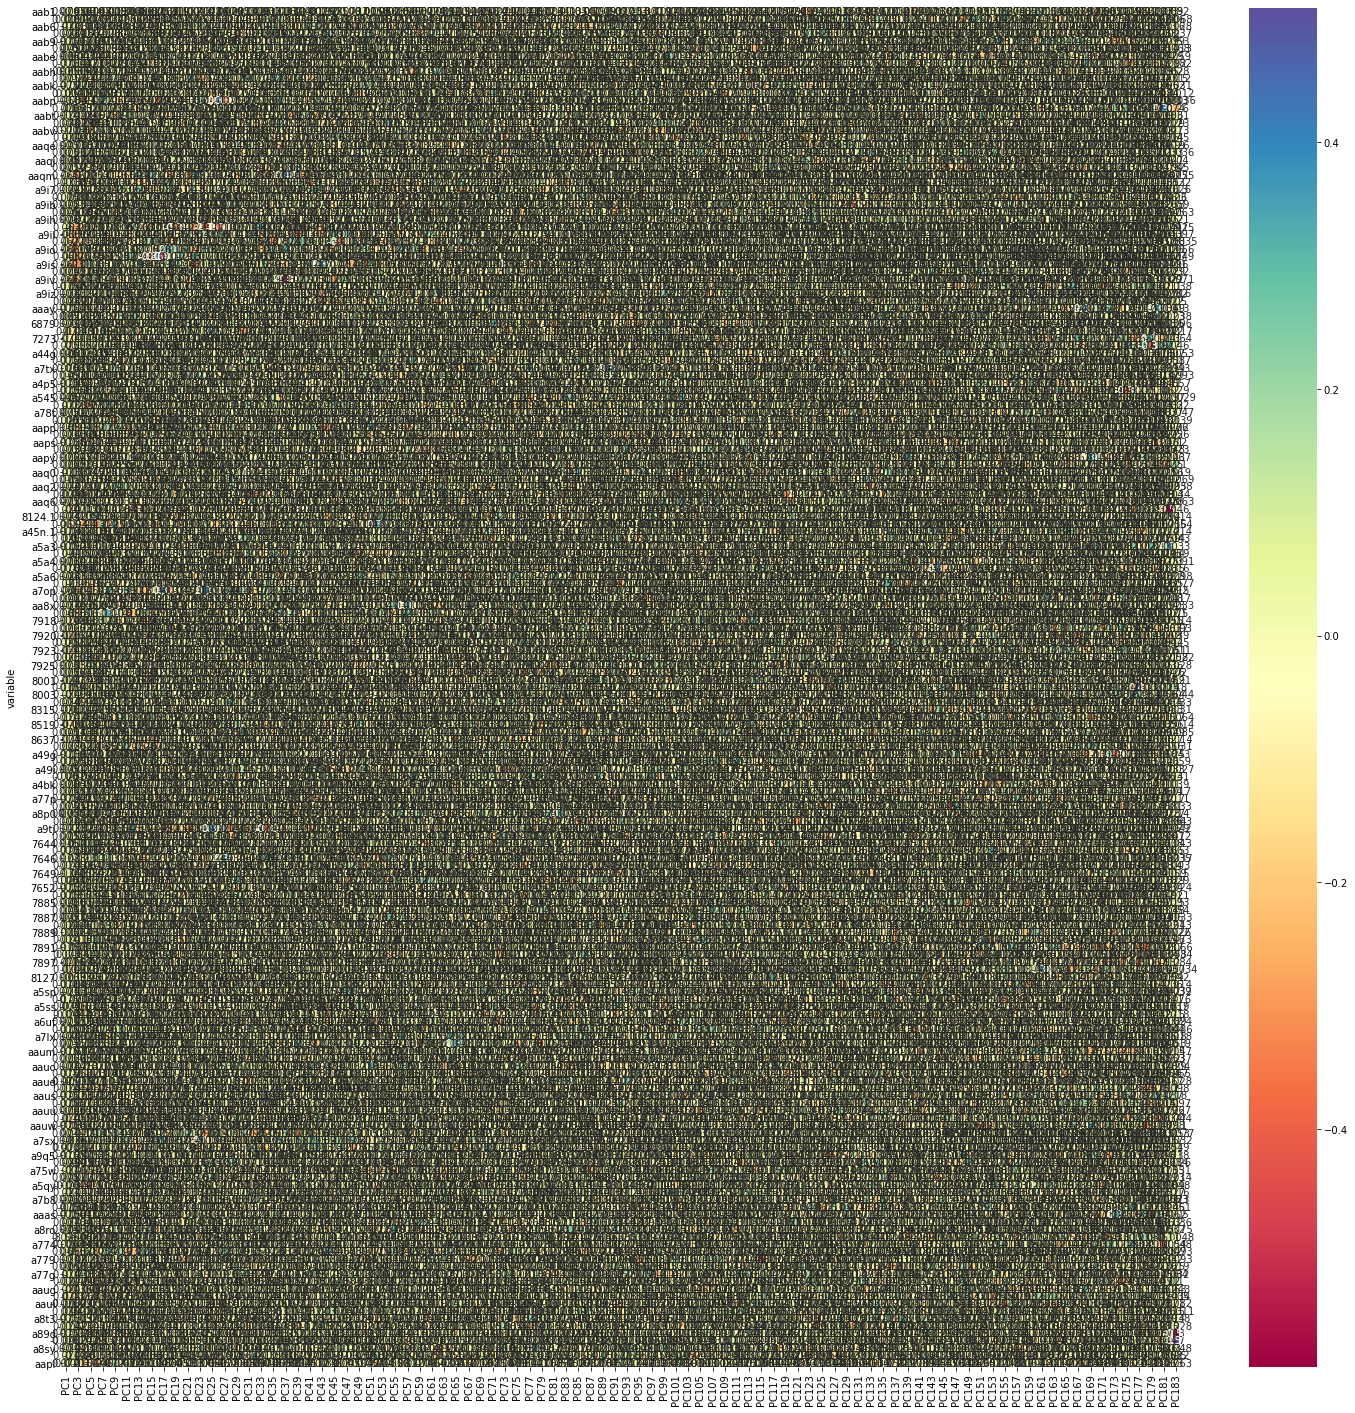

In [30]:
# Get "correlation matrix plot" for loadings

import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(25,25))
sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

**Feature relevances could be understood from the Heatmap visualisation (finds difficulty from this crowded map) . Histological type other is one major metadata which helps differentiate the data most of the others remains the same & is just a means of data vital status id also important.**

In [18]:
!pip install bioinfokit

     |████████████████████████████████| 81 kB 740 kB/s eta 0:00:01
  Created wheel for bioinfokit: filename=bioinfokit-2.0.3-py3-none-any.whl size=55623 sha256=9ba55978efefb87d5a698318db925d0966ad7a38a2555ea6e6e09d3d8874b860
  Stored in directory: /root/.cache/pip/wheels/d0/ea/c5/ef44410a466dbb590571080335cc5992736c5fba059e7a57f3
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7098 sha256=72e7321743c06baa1d1c17456a83cc85677c827f012db7d431943e17564a604e
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [32]:
import bioinfokit 
from bioinfokit import analys, visuz

bioinfokit.visuz.cluster.screeplot(obj=[pc_list, pca_out.explained_variance_ratio_])


**Find ./screeplot.png in output**

In [34]:
# Get PCA loadings plots:
# 2D
bioinfokit.visuz.cluster.pcaplot(x=loadings[0], y=loadings[1], labels=csv.columns.values, 
var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

# 3D
bioinfokit.visuz.cluster.pcaplot(x=loadings[0], y=loadings[1], z=loadings[2],  labels=csv.columns.values, 
var1=round(pca_out.explained_variance_ratio_[0]*100, 2), 
var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

**Find ./pcaplot_2d.png & pcaplot_3d.png in output**

**Neuroendocrine tumor types are distinguishable from the Adenocarcinoma tumors, as it is seen in the PCA-plot generated and also from other ones.**



## **K-Means Clustering**

In [19]:
#Removing rows containing NaN values

clusterdata = csvdata.dropna()
clusterdata

participant_id    aab1    aab4    aab6    aab8    aab9    aaba    aabe  \
123          SLC35E2  7.4500  8.1000  7.2000  8.0000  7.6500  8.1000  8.2000   
124             A1BG  6.4000  5.8000  6.4000  5.8000  6.7000  6.6000  6.3000   
127            A2LD1  7.5000  6.8000  7.3000  7.5000  7.4000  6.6000  7.1000   
129              A2M  14.300  14.000  13.100  13.800  14.600  13.300  13.400   
130           A4GALT  10.600  10.200  10.100  8.6000  10.100  9.3000  9.5000   
...              ...     ...     ...     ...     ...     ...     ...     ...   
18581           ZXDC     9.9      10      10     9.7     9.9    10.6    10.1   
18583         ZYG11B     9.2     9.3     9.4     9.4     9.3     9.9     9.1   
18584            ZYX    12.9    12.4    13.5    12.5      13    12.2    12.9   
18585          ZZEF1    10.1     9.8     9.8     9.7    10.1    10.4     9.7   
18586           ZZZ3     9.3     8.9     9.2     9.3     9.2     9.6     8.9   

         aabf    aabh  ...    aauh    aaui    aaul    a8t3    a8t5    a89d  \
123    8.2000  7.5500  ...  8.4500  7.9500  8.3000  8.0500  8.2000  7.2500   
124    6.5000  5.7000  ...  7.1000  7.1000  6.7000  7.0000  6.9000  7.1000   
127    6.8000  8.0000  ...  6.5000  7.3000  6.1000  6.7000  6.5000  6.7000   
129    14.200  13.900  ...  14.500  14.300  14.500  14.200  14.300  14.900   
130    8.4000  8.4000  ...  9.1000  9.5000  10.000  9.5000  9.1000  10.500   
...       ...     ...  ...     ...     ...     ...     ...     ...     ...   
18581     9.9     9.8  ...    10.1    10.1     9.9    10.1     9.8     9.5   
18583     9.5     8.9  ...     9.7     9.2     9.5     9.5     9.4     9.4   
18584    12.6    12.7  ...    12.4    12.6    13.5    12.5    12.7    13.6   
18585    10.6      10  ...    10.6     9.9     9.8    10.3    10.4    10.2   
18586     9.8     8.8  ...     9.6       9       9     9.5     9.2     8.5   

       a89d.1    a8sy    a8lh    aapl  
123    7.4000  7.3500  7.2000  9.0500  
124    7.3000  7.9000  6.0000  6.9000  
127    6.7000  6.5000  6.9000  6.7000  
129    14.500  13.000  12.100  13.300  
130    9.8000  10.800  8.3000  9.0000  
...       ...     ...     ...     ...  
18581     9.5     9.4     9.5    10.4  
18583     9.6     9.2     8.3     9.5  
18584    13.1    13.2    12.3    12.3  
18585     9.9     9.8     9.6    10.9  
18586     8.8     8.6     8.4     9.4  

[14098 rows x 184 columns]

In [20]:
clusterdata = clusterdata.drop(['participant_id'],axis = 1)

In [21]:
clusterdata.head()

aab1    aab4    aab6    aab8    aab9    aaba    aabe    aabf    aabh  \
123  7.4500  8.1000  7.2000  8.0000  7.6500  8.1000  8.2000  8.2000  7.5500   
124  6.4000  5.8000  6.4000  5.8000  6.7000  6.6000  6.3000  6.5000  5.7000   
127  7.5000  6.8000  7.3000  7.5000  7.4000  6.6000  7.1000  6.8000  8.0000   
129  14.300  14.000  13.100  13.800  14.600  13.300  13.400  14.200  13.900   
130  10.600  10.200  10.100  8.6000  10.100  9.3000  9.5000  8.4000  8.4000   

       aabi  ...    aauh    aaui    aaul    a8t3    a8t5    a89d  a89d.1  \
123  8.4500  ...  8.4500  7.9500  8.3000  8.0500  8.2000  7.2500  7.4000   
124  6.3000  ...  7.1000  7.1000  6.7000  7.0000  6.9000  7.1000  7.3000   
127  5.8000  ...  6.5000  7.3000  6.1000  6.7000  6.5000  6.7000  6.7000   
129  11.900  ...  14.500  14.300  14.500  14.200  14.300  14.900  14.500   
130  7.9000  ...  9.1000  9.5000  10.000  9.5000  9.1000  10.500  9.8000   

       a8sy    a8lh    aapl  
123  7.3500  7.2000  9.0500  
124  7.9000  6.0000  6.9000  
127  6.5000  6.9000  6.7000  
129  13.000  12.100  13.300  
130  10.800  8.3000  9.0000  

[5 rows x 183 columns]

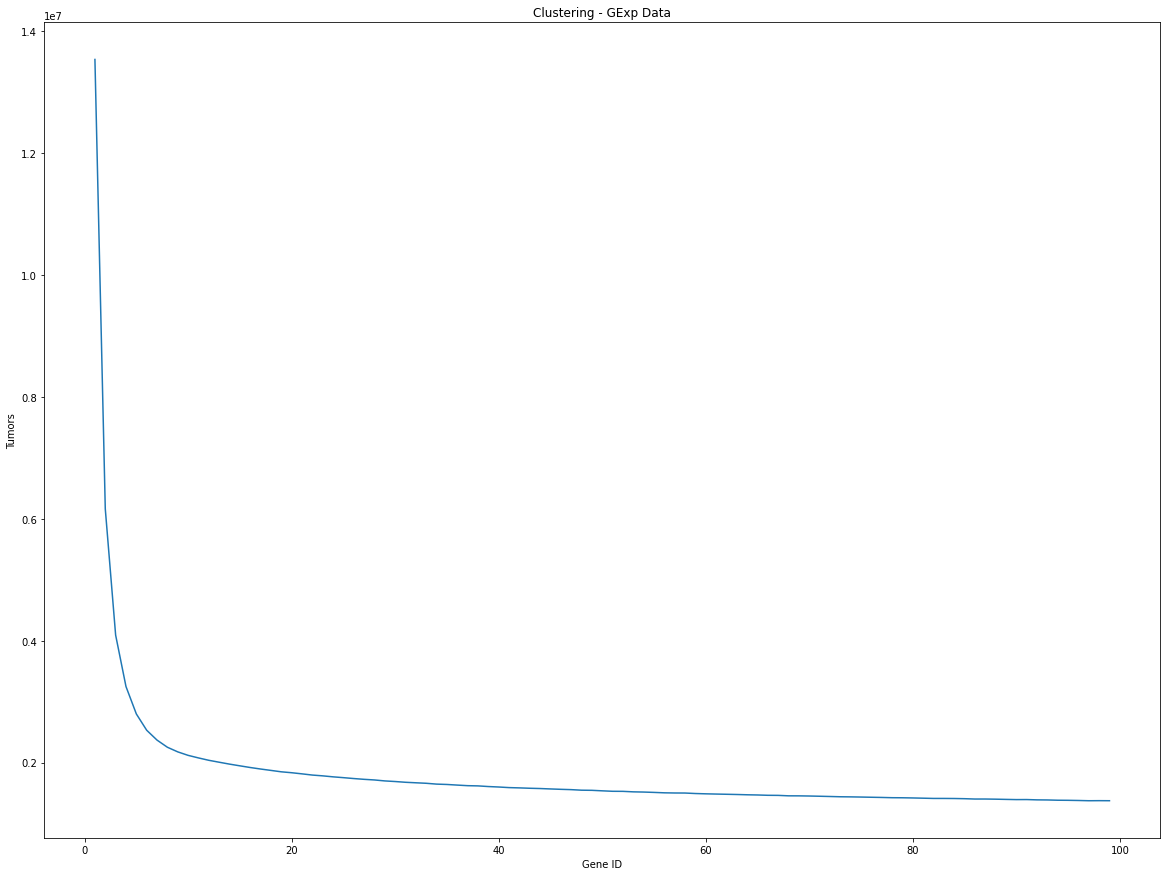

In [22]:
#Trial Example size

from sklearn.cluster import KMeans

clusters = []

for i in range(1, 100):
    km = KMeans(n_clusters=i).fit(clusterdata)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(20, 15))
sns.lineplot(x=list(range(1,100)), y= clusters , ax=ax)
ax.set_title('Clustering - GExp Data')
ax.set_xlabel('Gene ID')
ax.set_ylabel('Tumors')

plt.show()

In [23]:
clusterdata.astype(str)

aab1    aab4    aab6    aab8    aab9    aaba    aabe    aabf    aabh  \
123    7.4500  8.1000  7.2000  8.0000  7.6500  8.1000  8.2000  8.2000  7.5500   
124    6.4000  5.8000  6.4000  5.8000  6.7000  6.6000  6.3000  6.5000  5.7000   
127    7.5000  6.8000  7.3000  7.5000  7.4000  6.6000  7.1000  6.8000  8.0000   
129    14.300  14.000  13.100  13.800  14.600  13.300  13.400  14.200  13.900   
130    10.600  10.200  10.100  8.6000  10.100  9.3000  9.5000  8.4000  8.4000   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
18581     9.9    10.0    10.0     9.7     9.9    10.6    10.1     9.9     9.8   
18583     9.2     9.3     9.4     9.4     9.3     9.9     9.1     9.5     8.9   
18584    12.9    12.4    13.5    12.5    13.0    12.2    12.9    12.6    12.7   
18585    10.1     9.8     9.8     9.7    10.1    10.4     9.7    10.6    10.0   
18586     9.3     8.9     9.2     9.3     9.2     9.6     8.9     9.8     8.8   

         aabi  ...    aauh    aaui    aaul    a8t3    a8t5    a89d  a89d.1  \
123    8.4500  ...  8.4500  7.9500  8.3000  8.0500  8.2000  7.2500  7.4000   
124    6.3000  ...  7.1000  7.1000  6.7000  7.0000  6.9000  7.1000  7.3000   
127    5.8000  ...  6.5000  7.3000  6.1000  6.7000  6.5000  6.7000  6.7000   
129    11.900  ...  14.500  14.300  14.500  14.200  14.300  14.900  14.500   
130    7.9000  ...  9.1000  9.5000  10.000  9.5000  9.1000  10.500  9.8000   
...       ...  ...     ...     ...     ...     ...     ...     ...     ...   
18581    10.7  ...    10.1    10.1     9.9    10.1     9.8     9.5     9.5   
18583     8.3  ...     9.7     9.2     9.5     9.5     9.4     9.4     9.6   
18584    12.5  ...    12.4    12.6    13.5    12.5    12.7    13.6    13.1   
18585     9.9  ...    10.6     9.9     9.8    10.3    10.4    10.2     9.9   
18586     8.6  ...     9.6     9.0     9.0     9.5     9.2     8.5     8.8   

         a8sy    a8lh    aapl  
123    7.3500  7.2000  9.0500  
124    7.9000  6.0000  6.9000  
127    6.5000  6.9000  6.7000  
129    13.000  12.100  13.300  
130    10.800  8.3000  9.0000  
...       ...     ...     ...  
18581     9.4     9.5    10.4  
18583     9.2     8.3     9.5  
18584    13.2    12.3    12.3  
18585     9.8     9.6    10.9  
18586     8.6     8.4     9.4  

[14098 rows x 183 columns]

In [24]:
nclusterdata = clusterdata.astype(str)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


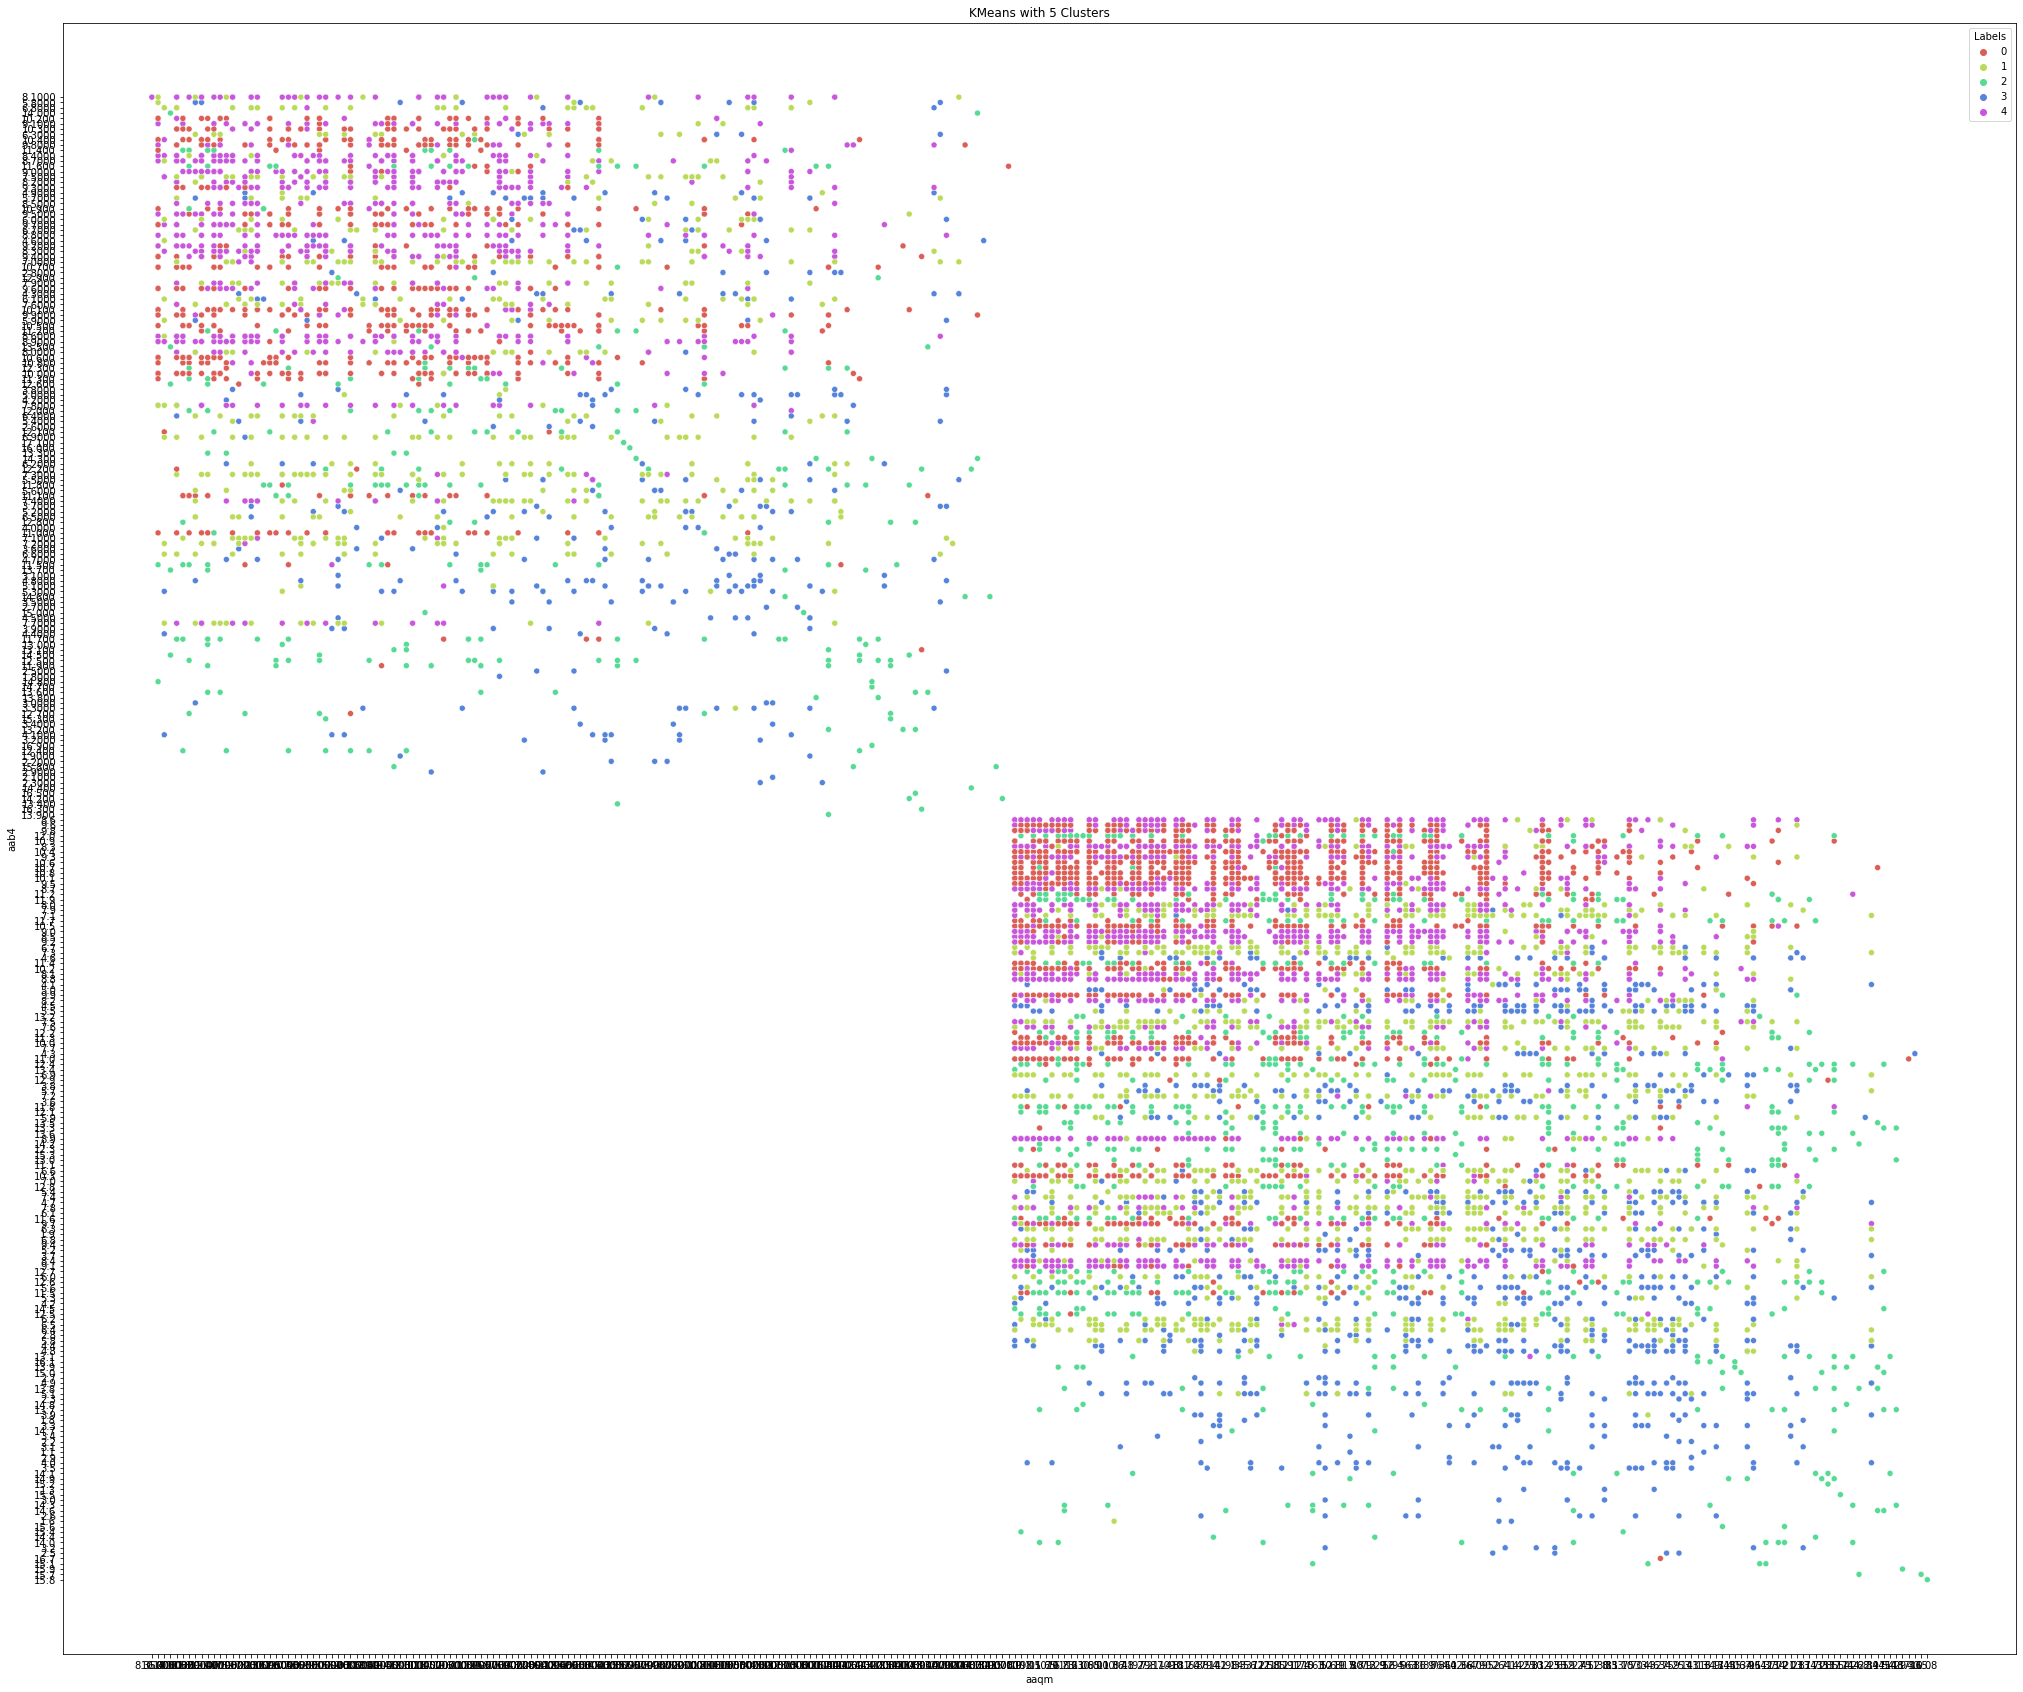

In [25]:
from sklearn.cluster import KMeans

km5 = KMeans(n_clusters=5).fit(nclusterdata)

nclusterdata['Labels'] = km5.labels_
plt.figure(figsize=(35, 30))
sns.scatterplot(nclusterdata['aaqm'], nclusterdata['aab4'], hue=nclusterdata['Labels'], 
                palette=sns.color_palette('hls', 5))

plt.title('KMeans with Clusters')

plt.show()

In [26]:
print(km5.cluster_centers_)

[[10.28717768 10.27412096 10.24406939 10.2447023  10.26160338 10.25436006
  10.26847164 10.31584623 10.3048992  10.19580403 10.27845757 10.27409752
  10.0668542  10.27707454 10.25635256 10.21547117 10.08870136 10.26877637
  10.2729489  10.29268636 10.30058603 10.24943741  9.95356306 10.20480544
  10.28420066 10.26160338 10.29132677 10.28914674 10.31962025  9.8548992
  10.06256446 10.11521331  9.95257853  9.8226676   9.72217534 10.28954524
   9.98087201 10.28481013 10.22609001 10.26751055 10.29477262 10.2839428
  10.26228317 10.1083685  10.25890764 10.26622128 10.2511955  10.20857947
  10.28171589 10.26422879 10.23790436 10.24763244 10.22475387 10.20581341
  10.28684951 10.28516174  9.96917487 10.23570089 10.26293952 10.24041256
  10.27906704 10.27390999 10.2029067  10.25897797 10.24188936 10.18813877
  10.21061885 10.24411627 10.2839428  10.01901078 10.26263479 10.26343179
  10.23506798 10.21755743 10.26950305 10.27151899 10.22662916 10.16901078
   9.9021097  10.29962494 10.26392405 10

In [27]:
print(km5.labels_)

[4 1 1 ... 2 0 4]


In [28]:
import bioinfokit
bioinfokit.__version__

'2.0.3'